<a href="https://colab.research.google.com/github/GitData-GA/racelab/blob/dev/tests/racelab_python_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import current library

In [1]:
pip install racelab

In [1]:
import sys
import os

!git clone -b dev https://github.com/GitData-GA/racelab.git racelab_dev

sys.path.insert(0, './racelab_dev/src')

Cloning into 'racelab_dev'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 199 (delta 75), reused 59 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (199/199), 195.88 KiB | 1013.00 KiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
import racelab as rl

# Development

## Test `load`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/load.py

In [3]:
track = rl.load(path="racelab_dev/tests/reInvent2019_track.npy")
track.shape

(155, 6)

## Test `plot`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/plot.py

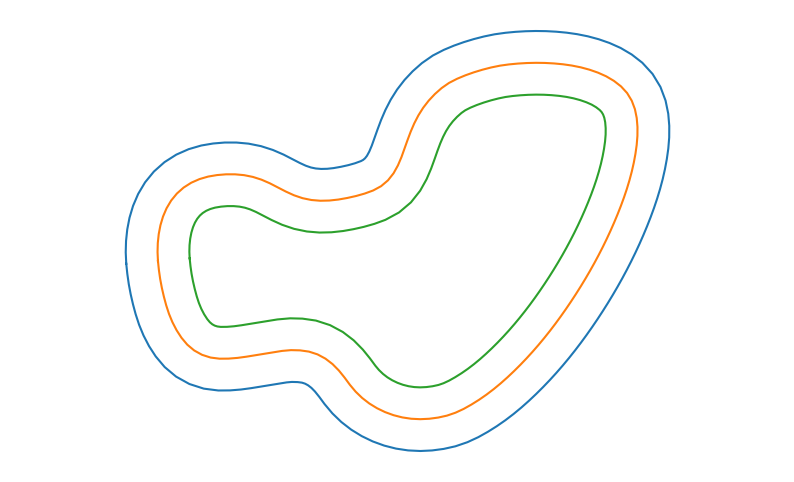

In [4]:
rl.plot(track)

## Test `optimize`

Source code: https://github.com/GitData-GA/racelab/blob/main/src/racelab/optimize.py

In [5]:
optimal = rl.optimize(track, 'k1999', line_iterations=500, xi_iterations=5, margin=0.3)

/content/./racelab_dev/src/racelab/optimizer/utils/k1999.py:13: RuntimeWarning: invalid value encountered in scalar divide
  theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))
/content/./racelab_dev/src/racelab/optimizer/utils/k1999.py:13: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vec21, vec23) / (norm21 * norm23))


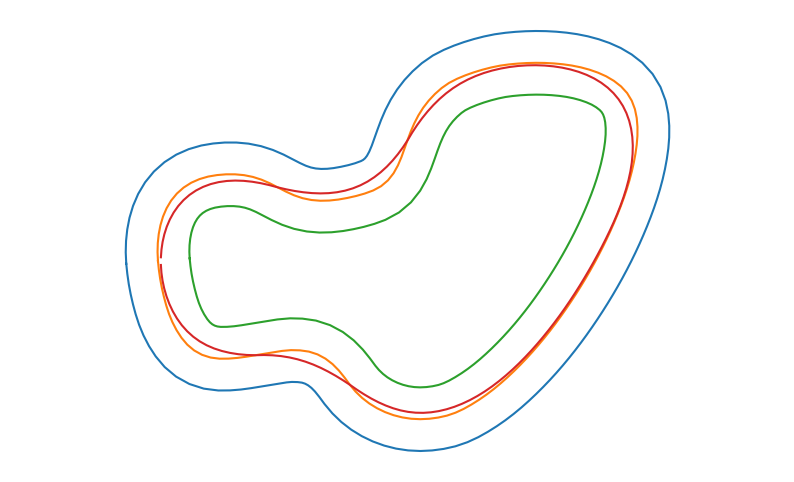

In [6]:
import numpy as np
rl.plot(np.hstack((track, optimal)))

# Push to GitHub

Make sure you have set up your GitHub token in this Colab notebook, which can be access through `userdata.get('gh_token')`.

In [ ]:
import os
from datetime import datetime
from google.colab import userdata
import pytz
os.system('git config --global user.email "lyuan@gd.edu.kg"')
os.system('git config --global user.name "lygitdata"')
repo_url = f"https://{userdata.get('gh_token')}@github.com/GitData-GA/racelab.git"
os.system('rm -rf main')
os.system(f'git clone --branch main {repo_url} main')
source_dir = "drive/MyDrive/racelab-python/racelab/*"
destination_dir = "main"
os.system(f'cp -r {source_dir} {destination_dir}')
os.chdir('main')
os.system('git add .')
os.system(f'git commit -m "{datetime.now(pytz.timezone("UTC")).strftime("%Y/%m/%d - %H:%M:%S")} UTC"')
os.system('git push origin main')
os.system('rm -r main')
os.system('cd ..')

0